In [3]:
import torch
import torchvision
from torchvision import transforms, datasets

In [5]:
train =datasets.MNIST('./data',train=True, download=True,
                       transform=transforms.Compose([transforms.ToTensor()]) )

test =datasets.MNIST('./data',train=False, download=True,
                       transform=transforms.Compose([transforms.ToTensor()]) )


  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



In [142]:
trainset = torch.utils.data.DataLoader(train, batch_size=32, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=32, shuffle=True)

In [143]:
for data in trainset:
    a,b=data

for data2 in testset:
    c,d=data2



print(a.shape)
print(b.shape)

print(c.shape)
print(d.shape)

torch.Size([32, 1, 28, 28])
torch.Size([32])
torch.Size([16, 1, 28, 28])
torch.Size([16])


In [ ]:
x, y= data[0][0], data[1][0]

print(y)

tensor(1)


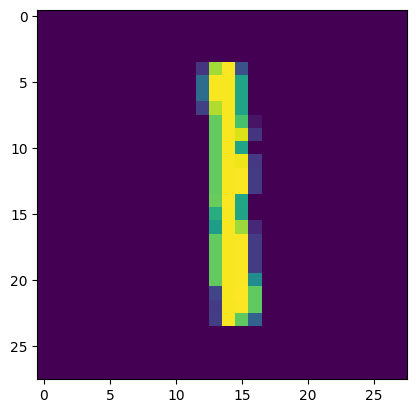

torch.Size([1, 28, 28])


In [ ]:
import matplotlib.pyplot as plt

plt.imshow(data[0][0].view(28,28))
plt.show()
print(data[0][0].shape)

In [ ]:
total=0
counter_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}

for data in trainset:
    Xs, ys = data
    for y in ys:
        counter_dict[int(y)]+=1
        total+=1

print(counter_dict)

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [ ]:

for i in counter_dict:
    print(f"{i}: {(counter_dict[i]/total)*100}")

0: 9.871666666666666
1: 11.236666666666666
2: 9.93
3: 10.218333333333334
4: 9.736666666666666
5: 9.035
6: 9.863333333333333
7: 10.441666666666666
8: 9.751666666666667
9: 9.915000000000001


In [ ]:
import torch.nn as nn 
import torch.nn.functional as F 


In [ ]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)

        return F.log_softmax(x, dim=1)


net = Net()
print(net)


Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [ ]:
X=torch.rand([28,28])
X=X.view(-1, 28*28)
X.shape

torch.Size([1, 784])

In [ ]:
output = net(X)
output

tensor([[-2.2403, -2.4796, -2.3506, -2.1981, -2.2988, -2.3456, -2.2403, -2.4865,
         -2.2170, -2.2188]], grad_fn=<LogSoftmaxBackward0>)

In [ ]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr=0.001)
EPOCHS = 3

for epoch in range(EPOCHS):
    for data in trainset:
        #data is a batch of feturesets and labels
        X, y = data
        # print(X[0])
        # print(y[0])
        net.zero_grad()
        output=net(X.view(-1, 28*28))
        loss= F.nll_loss(output, y)
        loss.backward()
        optimizer.step()
    print(loss)


tensor(0.1375, grad_fn=<NllLossBackward0>)
tensor(0.0526, grad_fn=<NllLossBackward0>)
tensor(0.0158, grad_fn=<NllLossBackward0>)


In [ ]:
correct=0
total=0
with torch.no_grad():
    for data in testset:
     Xt, yt = data
     ypred= net(Xt.view(-1, 28*28))
     for idx, i in enumerate(ypred):
         if torch.argmax(i)==yt[idx]:
               correct+=1
         total+=1
        
   #   print(ypred[0])
   #   print(ypred.shape)
   #   print(yt[0])
   #   print(torch.argmax(ypred[0]))
   #   break
print("Accuracy: ", round(correct/total, 4))



Accuracy:  0.9628


torch.Size([16, 10])
torch.Size([16])
torch.Size([16, 1, 28, 28])


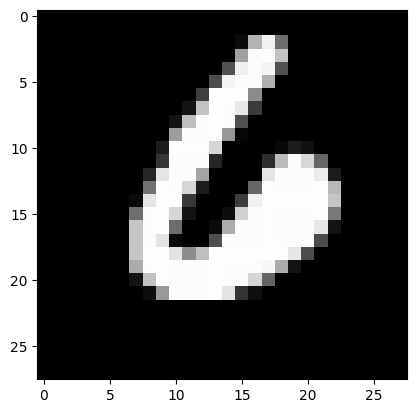

tensor(6)

In [ ]:
print(ypred.shape)
print(yt.shape)
print(Xt.shape)


for data in testset:
    # print(data)
    pass

# data.shape

Xx=data[0][2]
Yy=data[1][2]
plt.imshow(Xx.view(28,28), cmap="gray")
plt.show()

Yy